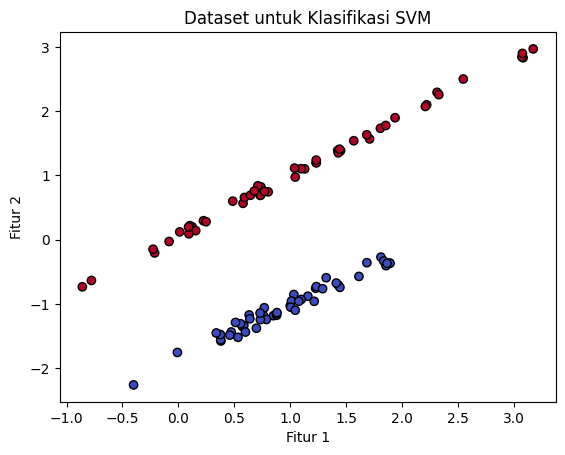

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Membuat dataset dengan 2 fitur, 2 kelas, dan 1 cluster per kelas
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Dataset untuk Klasifikasi SVM")
plt.savefig('Day_038_01.png', format='png', dpi=300)
plt.show()

In [5]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')

svm_model.fit(X, y)

SVC(kernel='linear')

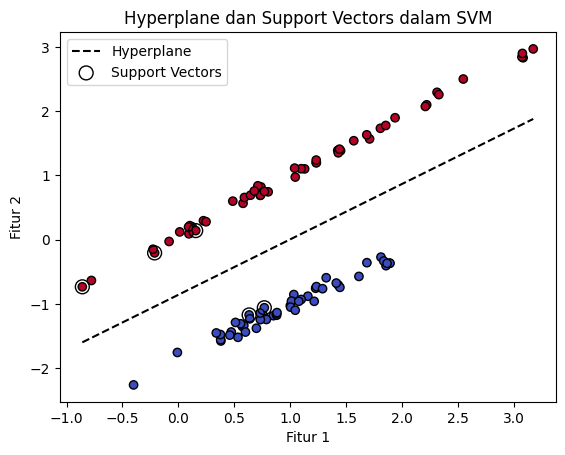

In [6]:
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = - (w[0] * x_vals + b) / w[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.plot(x_vals, y_vals, 'k--', label='Hyperplane')

plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100, edgecolors='black', facecolors='none', label="Support Vectors")

plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.title("Hyperplane dan Support Vectors dalam SVM")
plt.legend()
plt.savefig('Day_038_02.png', format='png', dpi=300)
plt.show()

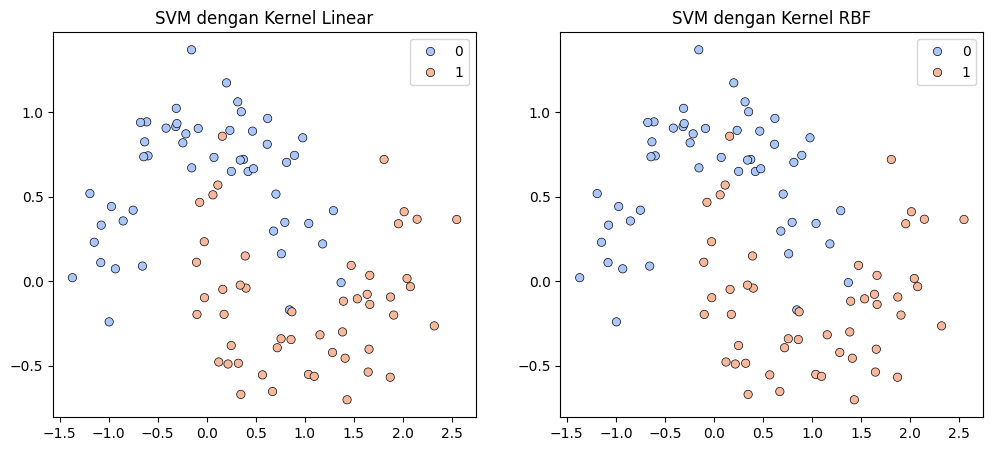

In [7]:
from sklearn.datasets import make_moons
import seaborn as sns

X_moon, y_moon = make_moons(n_samples=100, noise=0.2, random_state=42)

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_moon, y_moon)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_moon, y_moon)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(x=X_moon[:, 0], y=X_moon[:, 1], hue=y_moon, edgecolor='k', palette='coolwarm', ax=ax[0])
ax[0].set_title("SVM dengan Kernel Linear")

sns.scatterplot(x=X_moon[:, 0], y=X_moon[:, 1], hue=y_moon, edgecolor='k', palette='coolwarm', ax=ax[1])
ax[1].set_title("SVM dengan Kernel RBF")
plt.savefig('Day_038_03.png', format='png', dpi=300)
plt.show()